<a href="https://colab.research.google.com/github/msmsm104/TIL/blob/main/20220603/%EC%A0%84%EB%A0%A5%EC%82%AC%EC%9A%A9%EB%9F%89_%EC%98%88%EC%B8%A1_(Dacon)_0603.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. 라이브러리 및 데이터 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
base_path = '/content/drive/MyDrive/Colab Notebooks/이어드림스쿨/TIL(Today I Learned)/20220603/data/'

train = pd.read_csv(base_path + 'train.csv', encoding='cp949')
test = pd.read_csv(base_path + 'test.csv', encoding='cp949')
submission = pd.read_csv(base_path + 'sample_submission.csv', encoding='cp949')

In [ ]:
pd.set_option('display.max_rows', 100)
train[train['num'] == 2]

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유
2040,2,2020-06-01 00,977.184,18.3,2.5,94.0,0.0,0.0,1.0,0.0
2041,2,2020-06-01 01,966.168,18.8,2.3,89.0,0.0,0.0,1.0,0.0
2042,2,2020-06-01 02,972.972,19.0,3.2,86.0,0.0,0.0,1.0,0.0
2043,2,2020-06-01 03,965.844,19.0,4.1,85.0,0.0,0.0,1.0,0.0
2044,2,2020-06-01 04,971.676,18.9,3.9,87.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
4075,2,2020-08-24 19,1353.348,27.9,1.7,83.0,0.0,0.6,1.0,0.0
4076,2,2020-08-24 20,1260.036,27.4,1.4,83.0,0.0,0.0,1.0,0.0
4077,2,2020-08-24 21,1214.028,27.1,1.4,86.0,0.0,0.0,1.0,0.0
4078,2,2020-08-24 22,1126.224,26.9,0.0,84.0,0.0,0.0,1.0,0.0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122400 entries, 0 to 122399
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   num         122400 non-null  int64  
 1   date_time   122400 non-null  object 
 2   전력사용량(kWh)  122400 non-null  float64
 3   기온(°C)      122400 non-null  float64
 4   풍속(m/s)     122400 non-null  float64
 5   습도(%)       122400 non-null  float64
 6   강수량(mm)     122400 non-null  float64
 7   일조(hr)      122400 non-null  float64
 8   비전기냉방설비운영   122400 non-null  float64
 9   태양광보유       122400 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 9.3+ MB


### column별 설명
 - num : 건물번호 (1 - 60) 60개의 건물
 - date_time : 시간
 - 전력사용량(kWh) : 시간당 전력사용량 (target) => 회귀(지도학습)
 - 기온, 풍속, 습도, 강수량, 일조 : 기상 정보 (시간당)
 - 비전기냉방설비운영, 태양광보유 : categorical feature (0/1) (건물 정보)


### row - 시간당 사용한 전력 사용량

In [ ]:
test.head(10)

,num,date_time,기온(°C),풍속(m/s),습도(%),"강수량(mm, 6시간)","일조(hr, 3시간)",비전기냉방설비운영,태양광보유
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,NaN,NaN
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,NaN,NaN
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,2020-08-25 05,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1,2020-08-25 06,26.1,1.3,83.0,0.0,0.0,NaN,NaN
7,1,2020-08-25 07,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1,2020-08-25 08,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1,2020-08-25 09,28.8,1.2,77.0,NaN,1.1,NaN,NaN


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   num           10080 non-null  int64  
 1   date_time     10080 non-null  object 
 2   기온(°C)        3360 non-null   float64
 3   풍속(m/s)       3360 non-null   float64
 4   습도(%)         3360 non-null   float64
 5   강수량(mm, 6시간)  1680 non-null   float64
 6   일조(hr, 3시간)   3360 non-null   float64
 7   비전기냉방설비운영     2296 non-null   float64
 8   태양광보유         1624 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 708.9+ KB


In [ ]:
## column이름을 영문으로 변경

train.columns = ["num", "date_time", "target", "temperature",
                "windspeed", "humidity", "precipitation",
                "insolation", "nelec_cool_flag", "solar_flag"]
test.columns = ["num", "date_time", "temperature",
                "windspeed", "humidity", "precipitation",
                "insolation", "nelec_cool_flag", "solar_flag"]

In [ ]:
train.head(2)

,num,date_time,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0


## 2. 데이터 전처리

**데이터 전처리를 진행할 때 무조건 해야하는것**

 - 결측치 처리 : 결측치를 채우거나, 지우거나
 - categorical feature처리 : object형 column은 무조건 숫자로 변환.

### 2-1. 결측치 처리
#### 건물정보

In [ ]:
## 건물별로 'nelec_cool_flag', 'solar_flag'를 판단해 test set의 결측치를 보간

train[['num', 'nelec_cool_flag', 'solar_flag']].drop_duplicates()

# => train 기간내 건물별로 'nelec_cool_flag', 'solar_flag'는 고유한 값임을 알수잇다.

,num,nelec_cool_flag,solar_flag
0,1,0.0,0.0
2040,2,1.0,0.0
4080,3,1.0,1.0
6120,4,1.0,1.0
8160,5,1.0,0.0
10200,6,0.0,0.0
12240,7,1.0,0.0
14280,8,1.0,1.0
16320,9,0.0,1.0
18360,10,1.0,0.0


In [ ]:
building_info = train[['num', 'nelec_cool_flag', 'solar_flag']].drop_duplicates()

In [ ]:
test = test.drop(columns=['nelec_cool_flag', 'solar_flag'])
test

,num,date_time,temperature,windspeed,humidity,precipitation,insolation
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,NaN,NaN,NaN,NaN,NaN
10076,60,2020-08-31 20,NaN,NaN,NaN,NaN,NaN
10077,60,2020-08-31 21,27.9,4.1,68.0,NaN,0.0
10078,60,2020-08-31 22,NaN,NaN,NaN,NaN,NaN


In [ ]:
# test[['num','nelec_cool_flag']].drop_duplicates().dropna()
test = pd.merge(test, building_info, on=['num'])
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10080 entries, 0 to 10079
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   num              10080 non-null  int64  
 1   date_time        10080 non-null  object 
 2   temperature      3360 non-null   float64
 3   windspeed        3360 non-null   float64
 4   humidity         3360 non-null   float64
 5   precipitation    1680 non-null   float64
 6   insolation       3360 non-null   float64
 7   nelec_cool_flag  10080 non-null  float64
 8   solar_flag       10080 non-null  float64
dtypes: float64(7), int64(1), object(1)
memory usage: 787.5+ KB


### 기상정보 (강수량, 일조량, 풍속, 기온)
 - 결측치 처리

In [ ]:
test.head(10)

## temerature, windspeed, humidity, insolation, precipitation (기상정보)
# => 시간에 따라 자연스럽게 연속적으로 변화하는 feature이다. 
# => interpolation

,num,date_time,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag
0,1,2020-08-25 00,27.8,1.5,74.0,0.0,0.0,0.0,0.0
1,1,2020-08-25 01,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1,2020-08-25 02,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1,2020-08-25 03,27.3,1.1,78.0,NaN,0.0,0.0,0.0
4,1,2020-08-25 04,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5,1,2020-08-25 05,NaN,NaN,NaN,NaN,NaN,0.0,0.0
6,1,2020-08-25 06,26.1,1.3,83.0,0.0,0.0,0.0,0.0
7,1,2020-08-25 07,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8,1,2020-08-25 08,NaN,NaN,NaN,NaN,NaN,0.0,0.0
9,1,2020-08-25 09,28.8,1.2,77.0,NaN,1.1,0.0,0.0


In [ ]:
test['temperature'].interpolate(method='quadratic')

## => pad, linear, quadratic 등 여러 보간법이 존재. 가장 적절한 보간법을 선택한 후 결측치를 채운다.

0        27.800000
1        27.806027
2        27.639360
3        27.300000
4        26.787947
           ...    
10075    28.679729
10076    28.313063
10077    27.900000
10078          NaN
10079          NaN
Name: temperature, Length: 10080, dtype: float64

In [ ]:
## test set같은 경우 7일 동안의 기상정보, train set은 85일의 기상정보
# => train set을 test set과 동일한 형태로 결측치를 준 다음. interpolation을 통해 보간한다.
# => 이후 원본 train set 과 interpolate된 set의 오류을 구해 비교해 본다면 어떤 방식으로 결측치를 채우는 것이 
# 가장 좋은 보간법인지 선정할 수 있다고 생각한다.

In [ ]:
# 1. train set을 test set과 동일한 형태로 변환

temp = train.copy()

# [temp['temperature'][i] if i % 3 == 0 else None for i in range(len(temp))]


def make_temp_nan(data, columns, n):

    data[columns] = [data[columns][i] if i % n == 0 else None for i in range(len(data))]

make_temp_nan(temp, 'temperature', 3)
make_temp_nan(temp, 'windspeed', 3)
make_temp_nan(temp, 'humidity', 3)
make_temp_nan(temp, 'insolation', 3)
make_temp_nan(temp, 'precipitation', 6)


temp.head(15)

## train set의 copy인 temp를 test와 동일한 형태로 변환

,num,date_time,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,1,2020-06-01 02,8107.128,NaN,NaN,NaN,NaN,NaN,0.0,0.0
3,1,2020-06-01 03,8048.808,17.1,3.2,91.0,NaN,0.0,0.0,0.0
4,1,2020-06-01 04,8043.624,NaN,NaN,NaN,NaN,NaN,0.0,0.0
5,1,2020-06-01 05,8010.576,NaN,NaN,NaN,NaN,NaN,0.0,0.0
6,1,2020-06-01 06,7978.176,16.7,3.4,90.0,0.1,0.0,0.0,0.0
7,1,2020-06-01 07,8019.000,NaN,NaN,NaN,NaN,NaN,0.0,0.0
8,1,2020-06-01 08,8020.944,NaN,NaN,NaN,NaN,NaN,0.0,0.0
9,1,2020-06-01 09,8083.152,19.3,2.1,73.0,NaN,0.7,0.0,0.0


In [ ]:
from sklearn.metrics import mean_absolute_error

def compare_interpolation_methods(train, dummy, columns, methods, metric):
    error_dict = {}
    
    for elem in methods:
        if elem == 'quadratic':
            error = metric(train[columns], dummy[columns].interpolate(method=elem).interpolate(method='linear'))
            error_dict[elem] = error
        else:
            error = metric(train[columns], dummy[columns].interpolate(method=elem))
            error_dict[elem] = error

    return error_dict

compare_interpolation_methods(train, temp, 'temperature', ['pad', 'linear', 'quadratic'], mean_absolute_error)

{'linear': 0.21976633986928107,
 'pad': 0.5522638888888888,
 'quadratic': 0.20985326568697252}

In [ ]:
all_error_dict = {}

for column in ['temperature', 'windspeed', 'humidity', 'insolation', 'precipitation']:
    methods = ['pad', 'linear', 'quadratic']
    error_dict = compare_interpolation_methods(train, temp, column, methods, mean_absolute_error)
    all_error_dict[column] = error_dict
all_error_df = pd.DataFrame(all_error_dict)

pad          0.443193
linear       0.346830
quadratic    0.367535
Name: windspeed, dtype: float64

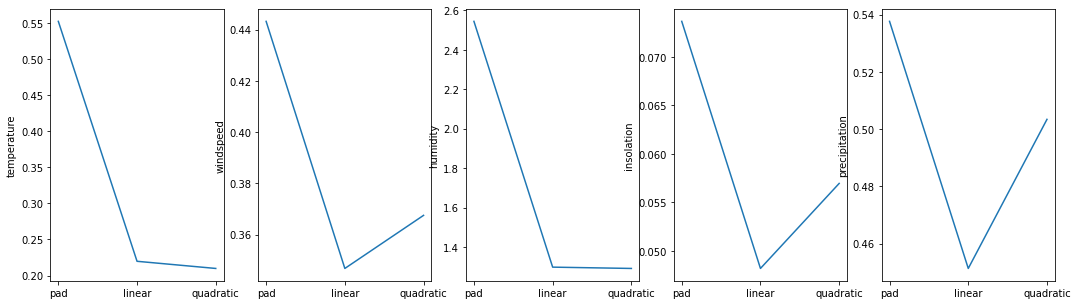

In [ ]:
f, ax = plt.subplots(1, 5, figsize=(18, 5))

for i in range(len(all_error_df.columns)):
    sns.lineplot(ax=ax[i], data=all_error_df.iloc[:, i], sort=False)


plt.show()

In [ ]:
## temperature, humidity의 경우 quadratic
## 나머지는 linear를 사용하여 결측치를 보간하는것이 가장 좋다.
test['temperature'] = test['temperature'].interpolate(method='quadratic').interpolate(method='linear')
test['humidity'] = test['humidity'].interpolate(method='quadratic').interpolate(method='linear')
test['windspeed'] = test['windspeed'].interpolate(method='linear')
test['insolation'] = test['insolation'].interpolate(method='linear')
test['precipitation'] = test['precipitation'].interpolate(method='linear')

test


,num,date_time,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag
0,1,2020-08-25 00,27.800000,1.500000,74.000000,0.0,0.000000,0.0,0.0
1,1,2020-08-25 01,27.806027,1.366667,75.017358,0.0,0.000000,0.0,0.0
2,1,2020-08-25 02,27.639360,1.233333,76.350691,0.0,0.000000,0.0,0.0
3,1,2020-08-25 03,27.300000,1.100000,78.000000,0.0,0.000000,0.0,0.0
4,1,2020-08-25 04,26.787947,1.166667,79.965285,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...
10075,60,2020-08-31 19,28.679729,3.566667,65.645299,0.0,0.533333,1.0,1.0
10076,60,2020-08-31 20,28.313063,3.833333,66.645299,0.0,0.266667,1.0,1.0
10077,60,2020-08-31 21,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0
10078,60,2020-08-31 22,27.900000,4.100000,68.000000,0.0,0.000000,1.0,1.0


In [ ]:
train.head(2)

,num,date_time,target,temperature,windspeed,humidity,precipitation,insolation,nelec_cool_flag,solar_flag
0,1,2020-06-01 00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0
1,1,2020-06-01 01,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0


In [ ]:
from sklearn.model_selection import train_test_split

X = train.drop(columns=['num', 'date_time', 'target'])
y = train['target']

X_train, X_val, y_train, y_val = \
train_test_split(X, y, test_size=0.2, random_state=0xC0FFEE)

X_train.shape, X_val.shape, y_train.shape, y_val.shape

((97920, 7), (24480, 7), (97920,), (24480,))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate


# kf = KFold(n_splits = 5, shuffle = True, random_state = 50)
# kf.get_n_splits(X)
# print(kf)

model_1 = LGBMRegressor()

cv = KFold(n_splits=5, shuffle=True, random_state=0xC0FFEE)

cross_validate(model_1, X, y, cv=cv, n_jobs=-1)





{'fit_time': array([1.0071435 , 1.02852559, 1.00791144, 1.00310993, 0.74746323]),
 'score_time': array([0.14536142, 0.16552877, 0.14974737, 0.16206336, 0.09963894]),
 'test_score': array([0.13332145, 0.12973881, 0.13192911, 0.13424477, 0.12848479])}

In [ ]:
test = test.drop(columns=['num','date_time'])

In [ ]:
from sklearn.model_selection import cross_val_predict


cross_val_predict(model_1, )

NotFittedError: ignored

---

In [ ]:
from lightgbm.sklearn import LGBMRegressor

In [ ]:
model = LGBMRegressor()
model.fit(X_train, y_train)
pred = model.predict(X_val)

In [ ]:
mean_absolute_error(y_val, pred)

1233.3811672954957